In [37]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [64]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
# data = pd.read_sql_query('SELECT * FROM loan', engine)
# data.head()

In [65]:
query = '''select f.title, f.film_id, f.release_year, f.language_id, f.rental_duration, f.rental_rate, f.length, f.replacement_cost, f.rating, fc.category_id, c.name
from film f
inner join film_category fc on f.film_id=fc.film_id
inner join category c on fc.category_id=c.category_id
where c.category_id < '5';'''

data = pd.read_sql_query(query, engine)
data.head()

,title,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,category_id,name
0,AMADEUS HOLY,19,2006,1,6,0.99,113,20.99,PG,1,Action
1,AMERICAN CIRCUS,21,2006,1,3,4.99,129,17.99,R,1,Action
2,ANTITRUST TOMATOES,29,2006,1,5,2.99,168,11.99,NC-17,1,Action
3,ARK RIDGEMONT,38,2006,1,6,0.99,68,25.99,NC-17,1,Action
4,BAREFOOT MANCHURIAN,56,2006,1,6,2.99,129,15.99,G,1,Action


In [66]:
data['category_id'].value_counts()

2    66
1    64
3    60
4    57
Name: category_id, dtype: int64

In [67]:
data.shape

(247, 11)

In [68]:
data.dtypes

title                object
film_id               int64
release_year          int64
language_id           int64
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
category_id           int64
name                 object
dtype: object

In [69]:
data.isna().sum()

title               0
film_id             0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
category_id         0
name                0
dtype: int64

In [70]:
#data['length'] = data['length'].astype('object') # This will be treated as categorical
#data['length'].value_counts()
data.describe()

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,category_id
count,247.000000,247.0,247.0,247.000000,247.000000,247.000000,247.000000,247.000000
mean,498.550607,2006.0,1.0,4.983806,2.771377,111.024291,20.516316,2.445344
std,287.651530,0.0,0.0,1.439759,1.603089,40.311281,6.239651,1.109845
min,14.000000,2006.0,1.0,3.000000,0.990000,46.000000,9.990000,1.000000
25%,249.500000,2006.0,1.0,4.000000,0.990000,78.500000,14.990000,1.000000
50%,487.000000,2006.0,1.0,5.000000,2.990000,108.000000,20.990000,2.000000
75%,751.500000,2006.0,1.0,6.000000,4.990000,143.000000,25.990000,3.000000
max,999.000000,2006.0,1.0,7.000000,4.990000,185.000000,29.990000,4.000000


In [71]:
data.isna().sum()

title               0
film_id             0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
category_id         0
name                0
dtype: int64

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

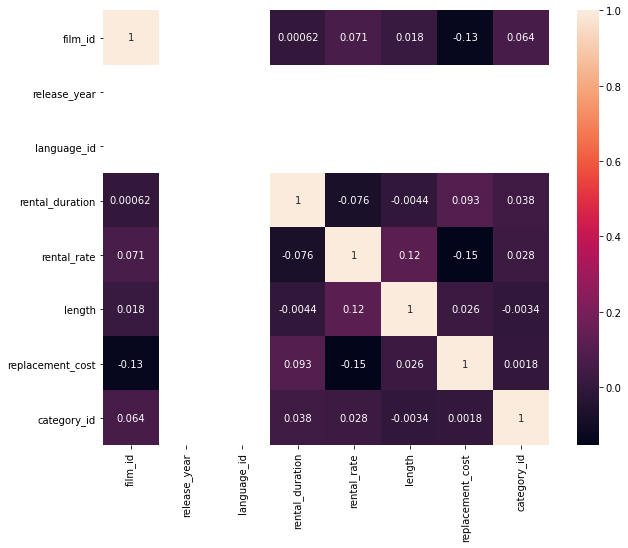

In [73]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [74]:
data = data.drop(['release_year','language_id'], axis=1, inplace = True)


In [80]:
data.head()

,title,film_id,rental_duration,rental_rate,length,replacement_cost,rating,category_id,name
0,AMADEUS HOLY,19,6,0.99,113,20.99,PG,1,Action
1,AMERICAN CIRCUS,21,3,4.99,129,17.99,R,1,Action
2,ANTITRUST TOMATOES,29,5,2.99,168,11.99,NC-17,1,Action
3,ARK RIDGEMONT,38,6,0.99,68,25.99,NC-17,1,Action
4,BAREFOOT MANCHURIAN,56,6,2.99,129,15.99,G,1,Action


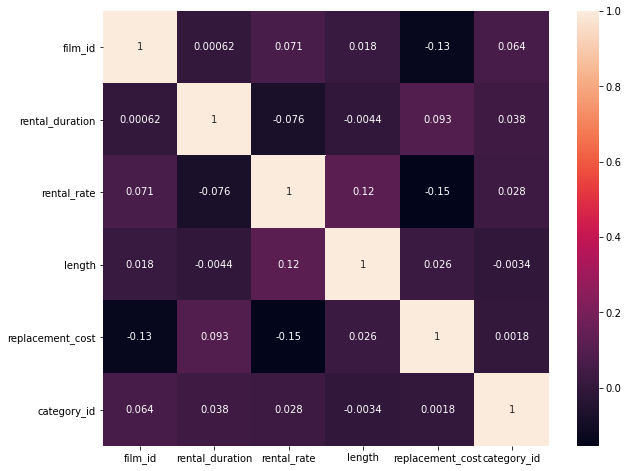

In [81]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


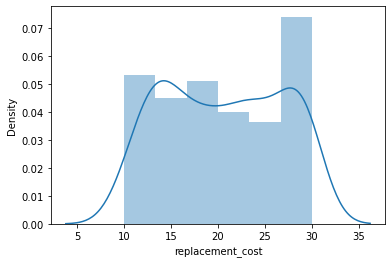

In [84]:
sns.distplot(data['replacement_cost'])
plt.show()

In [92]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = data.select_dtypes(include = np.number)
X = X.drop(['category_id'], axis = 1)
# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [93]:
data.head()

,title,film_id,rental_duration,rental_rate,length,replacement_cost,rating,category_id,name
0,AMADEUS HOLY,19,6,0.99,113,20.99,PG,1,Action
1,AMERICAN CIRCUS,21,3,4.99,129,17.99,R,1,Action
2,ANTITRUST TOMATOES,29,5,2.99,168,11.99,NC-17,1,Action
3,ARK RIDGEMONT,38,6,0.99,68,25.99,NC-17,1,Action
4,BAREFOOT MANCHURIAN,56,6,2.99,129,15.99,G,1,Action


In [94]:
cat = data.select_dtypes(include = np.object)
cat = cat.drop(['title','name'], axis=1)
categorical = pd.get_dummies(cat, columns=['rating'])

In [95]:
data.head()

,title,film_id,rental_duration,rental_rate,length,replacement_cost,rating,category_id,name
0,AMADEUS HOLY,19,6,0.99,113,20.99,PG,1,Action
1,AMERICAN CIRCUS,21,3,4.99,129,17.99,R,1,Action
2,ANTITRUST TOMATOES,29,5,2.99,168,11.99,NC-17,1,Action
3,ARK RIDGEMONT,38,6,0.99,68,25.99,NC-17,1,Action
4,BAREFOOT MANCHURIAN,56,6,2.99,129,15.99,G,1,Action


In [96]:
y = data['name']
X = np.concatenate((x, categorical), axis=1)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [114]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [115]:
classification.score(X_test, y_test)

0.29292929292929293

In [109]:
predictions = classification.predict(X_test)
predictions

array(['Animation', 'Animation', 'Animation', 'Children', 'Action',
       'Animation', 'Action', 'Action', 'Animation', 'Animation',
       'Animation', 'Animation', 'Animation', 'Action', 'Animation',
       'Action', 'Animation', 'Animation', 'Animation', 'Action',
       'Action', 'Animation', 'Classics', 'Animation', 'Animation',
       'Animation', 'Animation', 'Animation', 'Animation', 'Animation',
       'Children', 'Animation', 'Action', 'Animation', 'Animation',
       'Animation', 'Classics', 'Animation', 'Action', 'Children',
       'Animation', 'Children', 'Animation', 'Animation', 'Animation',
       'Action', 'Animation', 'Animation', 'Action', 'Animation',
       'Animation', 'Animation', 'Children', 'Animation', 'Children',
       'Animation', 'Animation', 'Animation', 'Animation', 'Animation',
       'Action', 'Animation', 'Action', 'Animation', 'Classics',
       'Animation', 'Action', 'Action', 'Animation', 'Action',
       'Animation', 'Animation', 'Animation', 'An

In [101]:
pd.Series(predictions).value_counts()

Action       48
Animation    37
Children     14
dtype: int64

In [102]:
y_test.value_counts()

Classics     28
Animation    25
Action       24
Children     22
Name: name, dtype: int64

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[12,  9,  3,  0],
       [12, 10,  3,  0],
       [ 8,  9,  5,  0],
       [16,  9,  3,  0]], dtype=int64)

In [104]:
classification.predict_proba(X_test)

array([[0.52159386, 0.10176157, 0.25501145, 0.12163311],
       [0.20835545, 0.33398594, 0.25131156, 0.20634705],
       [0.47650919, 0.11567493, 0.26508835, 0.14272753],
       [0.20779709, 0.3336793 , 0.25136214, 0.20716147],
       [0.3401846 , 0.25914799, 0.28396584, 0.11670156],
       [0.37299658, 0.22798464, 0.19314918, 0.2058696 ],
       [0.39697538, 0.22384596, 0.19644936, 0.18272929],
       [0.20823781, 0.33307718, 0.25221087, 0.20647414],
       [0.18540939, 0.28227199, 0.3023451 , 0.22997352],
       [0.202443  , 0.35792834, 0.26813943, 0.17148922],
       [0.20981684, 0.33400055, 0.25191512, 0.20426749],
       [0.38797708, 0.13857313, 0.26125755, 0.21219224],
       [0.40133026, 0.13597043, 0.26444433, 0.19825498],
       [0.37226791, 0.22812713, 0.19286559, 0.20673937],
       [0.37536602, 0.13962267, 0.25825524, 0.22675606],
       [0.17792732, 0.36540144, 0.25490499, 0.20176625],
       [0.43199464, 0.21057585, 0.20186676, 0.15556275],
       [0.3876851 , 0.13893646,

In [105]:
classification.predict_proba(X_test)[::,0]

array([0.52159386, 0.20835545, 0.47650919, 0.20779709, 0.3401846 ,
       0.37299658, 0.39697538, 0.20823781, 0.18540939, 0.202443  ,
       0.20981684, 0.38797708, 0.40133026, 0.37226791, 0.37536602,
       0.17792732, 0.43199464, 0.3876851 , 0.42477123, 0.28804549,
       0.20679994, 0.20779275, 0.21756277, 0.37212508, 0.20716657,
       0.39364344, 0.20290114, 0.18238164, 0.20921941, 0.19843648,
       0.28754667, 0.18879629, 0.29723463, 0.38677774, 0.38397886,
       0.3797882 , 0.38853192, 0.1865476 , 0.17802326, 0.21016149,
       0.17894297, 0.38122639, 0.38216462, 0.37761594, 0.43029626,
       0.1777707 , 0.2056908 , 0.19143626, 0.37575379, 0.39180134,
       0.17926917, 0.37295739, 0.21353936, 0.22142295, 0.17857721,
       0.3928758 , 0.38081095, 0.17912549, 0.38021957, 0.41432285,
       0.37870282, 0.18829766, 0.37492174, 0.37443549, 0.21706516,
       0.23302865, 0.38066846, 0.38996411, 0.18369559, 0.20444609,
       0.18522615, 0.18612212, 0.21991043, 0.18197333, 0.37624

In [126]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0,1,2])
n_classes = 4
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [125]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,